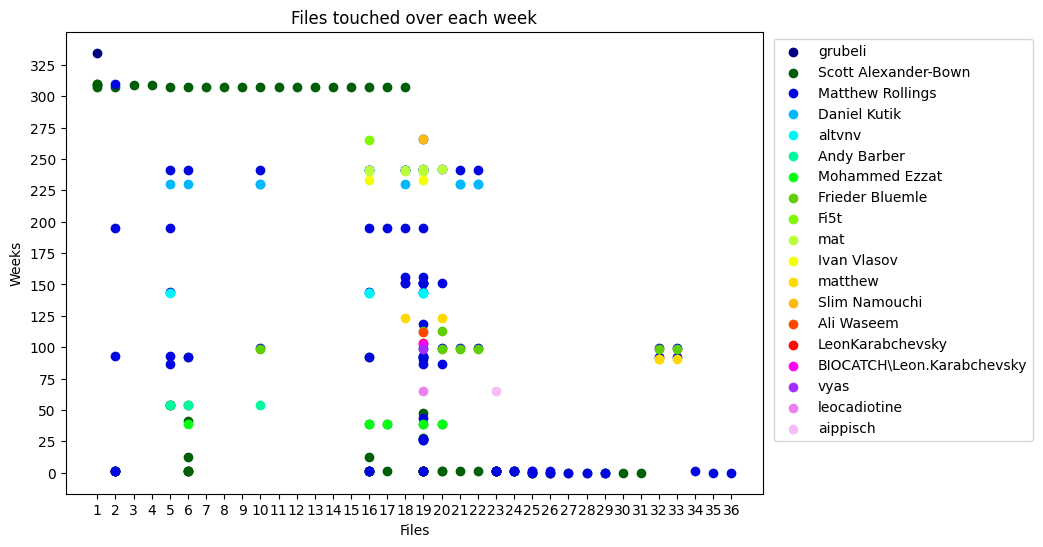

In [196]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Read CSV file
data = pd.read_csv('data/file_rootbeer.csv') 

# Assign unique color to each author
authors = data['Author'].unique()
color_list = plt.cm.gist_ncar(np.linspace(0, 1, len(authors)+1))
colors = {auth: col for auth, col in zip(authors, color_list)}

# Convert Date column to datetime and calculate the weeks
data['Date'] = pd.to_datetime(data['Date'])
minimun_date = data['Date'].min()
data['Weeks'] = [(new_date - minimun_date).days/ 7 for new_date in data['Date']]

# Create scatter plot
plt.figure(figsize=(9, 6))

# Get the x and y, and plot the scatterplo
for auth in authors:
    final_data = data[data['Author'] == auth]
    y = final_data['Weeks']
    x = final_data['Filename']
    plt.scatter(x, y, color=colors[auth], label=auth)

# Add the axis labels and legend
plt.xlabel('Files')
plt.ylabel('Weeks')
plt.title('Files touched over each week')
plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left')
plt.xticks(np.arange(0, 36, step=1),  labels=[str(x+1) for x in range(36)])
plt.yticks(np.arange(0,350, step=25))
plt.savefig('Valdivia_Scatterplot.png')
plt.show()
